<a href="https://colab.research.google.com/github/NataliaOsiecka/SkinCancer/blob/main/SkinCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Loading data from Kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nosieckadrewniak","key":"0e34ce12737de53a4e9d9cc584569e80"}'}

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install -q kaggle

In [4]:
#kaggle API client expects that kaggle.jason will be in ~/.kaggle 
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#this permission change avoids a warning on kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!mkdir SkinCancer
%cd SkinCancer

/content/SkinCancer


In [6]:
!kaggle datasets list -s SkinCancer

ref                                           title                                   size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------  -------------------------------------  -----  -------------------  -------------  ---------  ---------------  
tsaideepak/skincancer                         skincancer                             462MB  2019-03-18 14:35:52            117          4  0.375            
eduardomorais/skincancerdataset-drnatalia     skincancer-dataset_drnatalia             8MB  2019-12-06 14:56:03             31          3  0.125            
vinitasilaparasetty/skincancer-clean          skincancer_clean                         3GB  2021-08-18 21:00:46             31          3  0.5882353        
datajameson/skincancerdataset                 SkinCancerDataset                      786MB  2021-03-03 08:35:05             39          6  0.1875           
sanjai899/skincancer                          skincancer  

In [7]:
!kaggle datasets download tsaideepak/skincancer
%cd ..

 97% 449M/462M [00:05<00:00, 89.7MB/s]
100% 462M/462M [00:05<00:00, 89.5MB/s]
/content


In [8]:
!unzip SkinCancer/skincancer.zip -d SkinCancer
!rm SkinCancer/skincancer.zip

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: SkinCancer/datatree/train/nv/ISIC_0029903.jpg  
  inflating: SkinCancer/datatree/train/nv/ISIC_0029904.jpg  
  inflating: SkinCancer/datatree/train/nv/ISIC_0029905.jpg  
  inflating: SkinCancer/datatree/train/nv/ISIC_0029906.jpg  
  inflating: SkinCancer/datatree/train/nv/ISIC_0029907.jpg  
  inflating: SkinCancer/datatree/train/nv/ISIC_0029908.jpg  
  inflating: SkinCancer/datatree/train/nv/ISIC_0029910.jpg  
  inflating: SkinCancer/datatree/train/nv/ISIC_0029911.jpg  
  inflating: SkinCancer/datatree/train/nv/ISIC_0029916.jpg  
  inflating: SkinCancer/datatree/train/nv/ISIC_0029918.jpg  
  inflating: SkinCancer/datatree/train/nv/ISIC_0029920.jpg  
  inflating: SkinCancer/datatree/train/nv/ISIC_0029921.jpg  
  inflating: SkinCancer/datatree/train/nv/ISIC_0029922.jpg  
  inflating: SkinCancer/datatree/train/nv/ISIC_0029923.jpg  
  inflating: SkinCancer/datatree/train/nv/ISIC_0029925.jpg  
  inflating: SkinCan

In [9]:
!pwd

/content


In [10]:
%cd SkinCancer

/content/SkinCancer


In [11]:
!ls

datatree


In [12]:
%cd ..

/content


In [13]:
!mkdir SkinCancer/datatree/test

In [14]:
!mkdir SkinCancer/datatree/test/akiec
!mkdir SkinCancer/datatree/test/bcc
!mkdir SkinCancer/datatree/test/bkl
!mkdir SkinCancer/datatree/test/df
!mkdir SkinCancer/datatree/test/mel
!mkdir SkinCancer/datatree/test/nv
!mkdir SkinCancer/datatree/test/vasc

In [15]:
!ls

drive  kaggle.json  sample_data  SkinCancer


In [16]:
%cd SkinCancer/datatree/test

/content/SkinCancer/datatree/test


In [17]:
!ls

akiec  bcc  bkl  df  mel  nv  vasc


2. Get familiar with the data
akiec - actinic keratoses and intraepithelial carcinomae
bcc - basal cell carcinoma
bkl - benign keratosis - like lesions
df - dermatofibroma
mel - melanoma
nv - melanocytic nevi
vasc - pyogenic granulomas and hemorrhage

In [18]:
catalog = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

In [19]:
!pip install tensorflow==2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.8/394.8 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.0/462.0 KB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 67.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4849 sha256=8f9e6a1f9dee2d3b965928633bdece78fa29556b81f17c325edb484a68a9748f
  Stored in directory: /root/.cache/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp38-linux_x86_64.whl

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import glob
import math
import os
import random
import shutil
import tensorflow as tf
#from sklearn.utils import class_weight 
from collections import Counter
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from google.colab.patches import cv2_imshow

In [21]:
!ls

akiec  bcc  bkl  df  mel  nv  vasc


In [22]:
%cd ..

/content/SkinCancer/datatree


In [23]:
%cd ..

/content/SkinCancer


In [24]:
%cd ..

/content


In [25]:
from IPython.utils import path
pathTrain = 'SkinCancer/datatree/train'
pathValidation = 'SkinCancer/datatree/validation'
pathTest = 'SkinCancer/datatree/test'

for i in catalog:
  print(i)
  print('train')
  print(len(glob.glob(os.path.join(pathTrain, i, '*.jpg'))))

  print('validation')
  validationListDir = glob.glob(os.path.join(pathValidation, i, '*.jpg'))
  elementsInValidation = len(validationListDir)
  print(elementsInValidation)
  
  elementsInTest = math.floor(elementsInValidation/2)
  print('test')
  print(elementsInTest)
  testDir = os.path.join(pathTest, i)
  for file_name in random.sample(validationListDir, elementsInTest):
    shutil.move(file_name, testDir)

akiec
train
260
validation
67
test
33
bcc
train
409
validation
105
test
52
bkl
train
877
validation
222
test
111
df
train
91
validation
24
test
12
mel
train
890
validation
223
test
111
nv
train
5362
validation
1343
test
671
vasc
train
111
validation
31
test
15


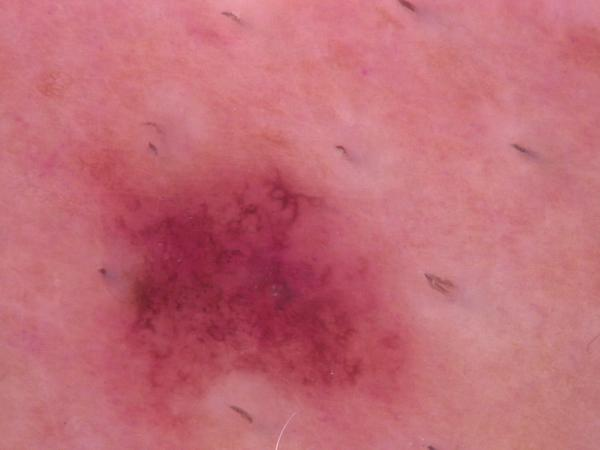

In [27]:
image = cv2.imread('/content/SkinCancer/datatree/test/nv/ISIC_0024309.jpg')
cv2_imshow(image)

In [28]:
image.shape

(450, 600, 3)

3. build train, test and validation generators

In [29]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range = 10,
                                        zoom_range = 0.1,
                                        shear_range = 0.2,
                                        width_shift_range = 0.1,
                                        height_shift_range = 0.2,
                                        horizontal_flip=True, 
                                        vertical_flip=True)


In [30]:
test_generator = ImageDataGenerator(rescale = 1./255)
val_generator = ImageDataGenerator(rescale = 1./255)

In [31]:
train_dataset = training_generator.flow_from_directory('/content/SkinCancer/datatree/train',
                                                       target_size = (108, 108),
                                                       batch_size = 100,
                                                       class_mode = 'categorical',
                                                       shuffle = True)

Found 8000 images belonging to 7 classes.


In [32]:
counter = Counter(train_dataset.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}  

In [33]:
train_dataset.class_indices

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

In [34]:
val_dataset = val_generator.flow_from_directory('/content/SkinCancer/datatree/validation',
                                                        target_size=(108, 108),
                                                        batch_size=10,
                                                        class_mode='categorical',
                                                        shuffle=False) # set as validation data

Found 1010 images belonging to 7 classes.


In [35]:
test_datatset = test_generator.flow_from_directory('/content/SkinCancer/datatree/test',
                                                   target_size = (108, 108),
                                                   batch_size = 10,
                                                   class_mode = 'categorical',
                                                   shuffle = False)

Found 1005 images belonging to 7 classes.


4. Build and train model

In [37]:
initializer1 = tf.keras.initializers.HeNormal()
values1 = initializer1(shape=(2,2))

initializer2 = tf.keras.initializers.GlorotUniform()
values2 = initializer2(shape=(2, 2))

In [38]:
network = Sequential()
network.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape = (108,108,3), kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=128, kernel_size=(3,3), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(Conv2D(filters=128, kernel_size=(3,3), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=256, kernel_size=(1,1), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(Conv2D(filters=256, kernel_size=(1,1), activation = 'relu', padding='same', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

#network.add(Dropout(0.2))
network.add(Dense(units = 256, activation = 'relu', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(Dense(units = 128, activation = 'relu', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(Dense(units = 64, activation = 'relu', kernel_initializer=initializer1))
network.add(BatchNormalization())
network.add(Dense(units = 32, activation = 'relu', kernel_initializer=initializer1, kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.0001, l2= 0.01)))
network.add(BatchNormalization())
network.add(Dense(units = 7, activation = 'softmax', kernel_initializer=initializer2))
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 106, 106, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 106, 106, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 53, 53, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 64)        0

In [39]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [40]:
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.001, patience = 10, verbose =1)
model_cp = ModelCheckpoint(filepath = 'best_model1.h5', monitor = 'val_accuracy', save_best_only = True, verbose = 1)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1, factor=0.5, min_lr=0.00001)

In [41]:
history = network.fit_generator(train_dataset, 
                                steps_per_epoch = 64,
                                validation_data = val_dataset,
                                validation_steps = 64, 
                                epochs=100,
                                class_weight=class_weights,
                                callbacks=[es, model_cp, learning_rate_reduction])

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
64/64 [==============================] - 455s 7s/step - loss: 10.0976 - accuracy: 0.2872 - val_loss: 2.8449 - val_accuracy: 0.2422

Epoch 00001: val_accuracy improved from -inf to 0.24219, saving model to best_model1.h5
Epoch 2/100
64/64 [==============================] - 438s 7s/step - loss: 7.7899 - accuracy: 0.3969 - val_loss: 2.4914 - val_accuracy: 0.3500

Epoch 00002: val_accuracy improved from 0.24219 to 0.35000, saving model to best_model1.h5
Epoch 3/100
64/64 [==============================] - 424s 7s/step - loss: 7.4311 - accuracy: 0.4467 - val_loss: 2.7593 - val_accuracy: 0.2781

Epoch 00003: val_accuracy did not improve from 0.35000
Epoch 4/100
64/64 [==============================] - 426s 7s/step - loss: 6.4946 - accuracy: 0.4707 - val_loss: 2.4357 - val_accuracy: 0.3703

Epoch 00004: val_accuracy improved from 0.35000 to 0.37031, saving model to best_model1.h5
Epoch 5/100
64/64 [==============================] - 435s 7s/step - loss: 6.4670 - accuracy: 0.4914 - 

5. testing the model

In [42]:
predictions=network.predict(test_datatset)
predictions = np.argmax(predictions, axis=1)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(test_datatset.classes, predictions)

0.6825870646766169

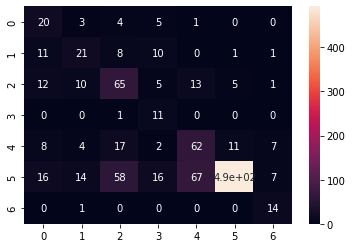

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_datatset.classes, predictions)
sns.heatmap(cm, annot=True);

In [45]:
train_dataset.class_indices

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

In [46]:
from sklearn.metrics import classification_report
print(classification_report(test_datatset.classes, predictions))

              precision    recall  f1-score   support

           0       0.30      0.61      0.40        33
           1       0.40      0.40      0.40        52
           2       0.42      0.59      0.49       111
           3       0.22      0.92      0.36        12
           4       0.43      0.56      0.49       111
           5       0.97      0.73      0.83       671
           6       0.47      0.93      0.62        15

    accuracy                           0.68      1005
   macro avg       0.46      0.68      0.51      1005
weighted avg       0.78      0.68      0.71      1005



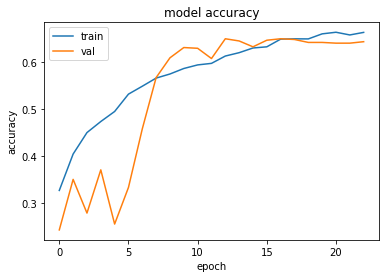

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

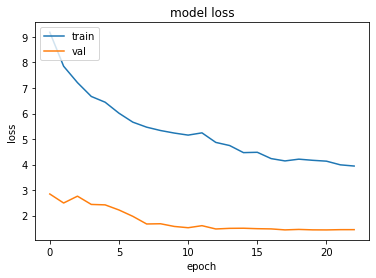

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [49]:
from tensorflow.keras.models import load_model
model = load_model('/content/best_model1.h5')

In [50]:
model.evaluate(test_datatset)

101/101 [==============================] - 20s 192ms/step - loss: 1.4113 - accuracy: 0.6836


[1.4113041162490845, 0.683582067489624]

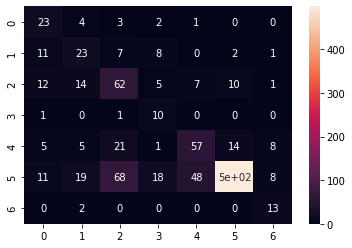

In [51]:
pred = model.predict(test_datatset)
pred = np.argmax(pred, axis=1)
cm = confusion_matrix(test_datatset.classes, pred)
sns.heatmap(cm, annot=True);

In [52]:
print(classification_report(test_datatset.classes, pred))

              precision    recall  f1-score   support

           0       0.37      0.70      0.48        33
           1       0.34      0.44      0.39        52
           2       0.38      0.56      0.45       111
           3       0.23      0.83      0.36        12
           4       0.50      0.51      0.51       111
           5       0.95      0.74      0.83       671
           6       0.42      0.87      0.57        15

    accuracy                           0.68      1005
   macro avg       0.46      0.67      0.51      1005
weighted avg       0.77      0.68      0.71      1005

